# Toronto Ferry Ticket Sales Trends (2015 - 2025)

### Problem Statement: 
### The City is looking to improve the Toronto ferry service ahead of a busy summer season. As a first step, they are seeking to understand the trends and patterns that exist in ticket sales over the last ten (10) years.

### Data Overview
#### Data Source: 
- Ticket DataOpen Data Toronto; https://open.toronto.ca/dataset/toronto-island-ferry-ticket-counts
- Weather: https://climate.weather.gc.ca/ 
- Holidays library)

#### Column meanings
- Date: The calendar date of the ticket activity (format: YYYY-MM-DD).

- Redemption Count: Number of tickets actually used/redeemed on that date.

- Sales Count: Number of tickets sold on that date, regardless of when they were used.

- Month-Year: A label like “Jan-2023” used for grouping and monthly trends.

- Day Name: The name of the weekday (e.g. Monday, Friday).

- Week Type: Categorizes the day as a Weekday or Weekend—helps spot commuter vs. leisure trends.

- Is Holiday: Indicates whether the date is a holiday (Yes or No)—important for peak traffic analysis.

- month: Numeric value of the month (1 = January, …, 12 = December); useful for sorting.

- season: Categorical label for the season (Winter, Spring, Summer, Fall), based on the month.

- Mean Temp °C: Average air temperature in Celsius for the day—key for weather impact analysis.

- Total Precip mm: Total rainfall or snowfall in millimeters—could affect outdoor travel and ticket usage.

- month_name: Text name of the month (e.g. “July”)—helps with plot readability.


### Import Libraries

In [8]:
#import required libraries

import pandas as pd
import numpy as np

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly 

import holidays 

import statsmodels

### Load the dataset

In [9]:
# load the datset

ticket_df = pd.read_excel("Toronto Island Ferry Ticket Counts.xlsx")
ticket_df.head()

,_id,Timestamp,Redemption Count,Sales Count
0,1,2025-06-20T00:30:00,0,3
1,2,2025-06-20T00:15:00,0,9
2,3,2025-06-20T00:00:00,0,25
3,4,2025-06-19T23:45:00,0,2
4,5,2025-06-19T23:30:00,2,7


### Check the data type for each column

In [10]:
#Check for data type for each column the info
ticket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247512 entries, 0 to 247511
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   _id               247512 non-null  int64 
 1   Timestamp         247512 non-null  object
 2   Redemption Count  247512 non-null  int64 
 3   Sales Count       247512 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.6+ MB


### Change the timestamp data type from Object to datetime

In [11]:
#convert timestamp column to datetime
ticket_df['Timestamp'] = pd.to_datetime(ticket_df['Timestamp'])

In [12]:
#Check again for data type for each column the info
ticket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247512 entries, 0 to 247511
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   _id               247512 non-null  int64         
 1   Timestamp         247512 non-null  datetime64[ns]
 2   Redemption Count  247512 non-null  int64         
 3   Sales Count       247512 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 7.6 MB


### Data Profiling 

In [13]:
ticket_df.describe()

,_id,Timestamp,Redemption Count,Sales Count
count,247512.000000,247512,247512.000000,247512.000000
mean,123756.500000,2020-07-20 17:33:37.349462272,47.011785,47.773962
min,1.000000,2015-05-01 13:30:00,0.000000,0.000000
25%,61878.750000,2018-02-01 11:56:15,3.000000,3.000000
50%,123756.500000,2020-08-20 02:22:30,10.000000,12.000000
75%,185634.250000,2023-02-05 21:45:00,38.000000,46.000000
max,247512.000000,2025-06-20 00:30:00,7216.000000,7229.000000
std,71450.704251,NaN,101.800874,97.631180


### Check for missing values

In [14]:
#check for missing values in each column
ticket_df.isnull().sum()

_id                 0
Timestamp           0
Redemption Count    0
Sales Count         0
dtype: int64

### Check for Duplicates

In [15]:
#check for duplicates
ticket_df.duplicated(keep=False)

0         False
1         False
2         False
3         False
4         False
          ...  
247507    False
247508    False
247509    False
247510    False
247511    False
Length: 247512, dtype: bool

### Check for outliers in Sales and Redemption Count

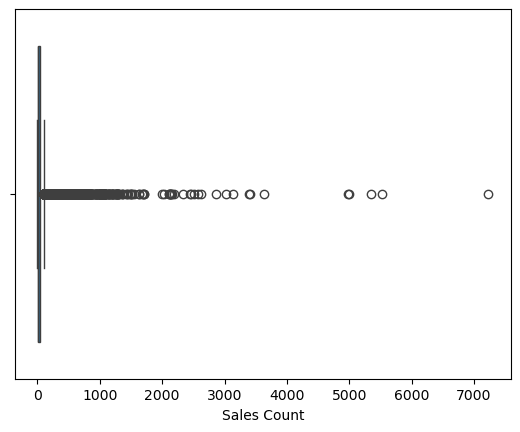

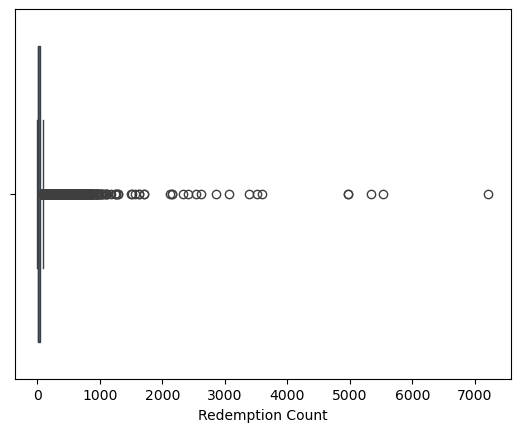

In [16]:
cols=['Sales Count', 'Redemption Count']
for i in cols:
    sns.boxplot(x=ticket_df[i])
    plt.show()


### Aggregate Data (15mins capture interval) to daily level: sum of Redemption and Sales counts

In [17]:
# 
daily_ticket_df = ticket_df.groupby(ticket_df['Timestamp'].dt.date).agg({
    'Redemption Count': 'sum',
    'Sales Count': 'sum'
}).reset_index().rename(columns={'Timestamp': 'Date'})

# Display the first few rows
print(daily_ticket_df.head())

         Date  Redemption Count  Sales Count
0  2015-05-01                 1            4
1  2015-05-04                12           75
2  2015-05-05               537          549
3  2015-05-06               989         1358
4  2015-05-07              1343         2170


### Save as excel workbook

In [18]:
daily_ticket_df.to_excel("daily_ticket_df.xlsx", index=False)

### Ensure Timestamp is in datetime format

In [19]:

daily_ticket_df['Date'] = pd.to_datetime(daily_ticket_df['Date'])
daily_ticket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3698 entries, 0 to 3697
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              3698 non-null   datetime64[ns]
 1   Redemption Count  3698 non-null   int64         
 2   Sales Count       3698 non-null   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 86.8 KB


### Create columns for Month-Year, Day Name, Week Type, Is_Holiday

In [20]:

# Month-Year (e.g., Jun-2025)
daily_ticket_df['Month-Year'] = daily_ticket_df['Date'].dt.strftime('%b-%Y')

# Day of week name (e.g., Monday)
daily_ticket_df['Day Name'] = daily_ticket_df['Date'].dt.day_name()

# Weekday or Weekend
daily_ticket_df['Week Type'] = daily_ticket_df['Date'].dt.weekday.apply(
    lambda x: 'Weekend' if x >= 5 else 'Weekday'
)

# Add Canada holidays using the `holidays` package
canada_holidays = holidays.CA(prov='ON')  # Ontario-specific

daily_ticket_df['Is Holiday'] = daily_ticket_df['Date'].apply(
    lambda date: 'Yes' if date in canada_holidays else 'No'
)

In [21]:
daily_ticket_df.head()

,Date,Redemption Count,Sales Count,Month-Year,Day Name,Week Type,Is Holiday
0,2015-05-01,1,4,May-2015,Friday,Weekday,No
1,2015-05-04,12,75,May-2015,Monday,Weekday,No
2,2015-05-05,537,549,May-2015,Tuesday,Weekday,No
3,2015-05-06,989,1358,May-2015,Wednesday,Weekday,No
4,2015-05-07,1343,2170,May-2015,Thursday,Weekday,No


### Create columns for MonthNumber and Season 

In [22]:

# Extract the month from the date
daily_ticket_df['month'] = daily_ticket_df['Date'].dt.month

# Define function to assign seasons
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:  # months 12, 1, 2
        return 'Winter'

#Apply function to create 'season' column
daily_ticket_df['season'] = daily_ticket_df['month'].apply(get_season)

daily_ticket_df.head()

,Date,Redemption Count,Sales Count,Month-Year,Day Name,Week Type,Is Holiday,month,season
0,2015-05-01,1,4,May-2015,Friday,Weekday,No,5,Spring
1,2015-05-04,12,75,May-2015,Monday,Weekday,No,5,Spring
2,2015-05-05,537,549,May-2015,Tuesday,Weekday,No,5,Spring
3,2015-05-06,989,1358,May-2015,Wednesday,Weekday,No,5,Spring
4,2015-05-07,1343,2170,May-2015,Thursday,Weekday,No,5,Spring


In [23]:
daily_ticket_df.tail()

,Date,Redemption Count,Sales Count,Month-Year,Day Name,Week Type,Is Holiday,month,season
3693,2025-06-16,5912,5967,Jun-2025,Monday,Weekday,No,6,Summer
3694,2025-06-17,5309,5422,Jun-2025,Tuesday,Weekday,No,6,Summer
3695,2025-06-18,2633,2737,Jun-2025,Wednesday,Weekday,No,6,Summer
3696,2025-06-19,3552,3932,Jun-2025,Thursday,Weekday,No,6,Summer
3697,2025-06-20,0,37,Jun-2025,Friday,Weekday,No,6,Summer


In [24]:
#Data Profiling
daily_ticket_df.describe()

,Date,Redemption Count,Sales Count,month
count,3698,3698.000000,3698.000000,3698.000000
mean,2020-05-26 03:04:11.162790656,3146.560573,3197.574094,6.512980
min,2015-05-01 00:00:00,0.000000,2.000000,1.000000
25%,2017-11-12 06:00:00,559.000000,471.000000,4.000000
50%,2020-05-25 12:00:00,1066.500000,1078.000000,6.000000
75%,2022-12-07 18:00:00,3699.000000,4018.250000,9.000000
max,2025-06-20 00:00:00,25748.000000,25585.000000,12.000000
std,NaN,4349.638603,4348.756821,3.427122


### Webscrape Daily Climate Data from Canada's Climate website Jan 1 2015 to Jun 20 2025

In [25]:
"""
import requests
from tqdm import tqdm
import pandas as pd

def fetch_daily_data(year: int, month: int) -> pd.DataFrame:
    \"\"\"
    Fetch daily climate data from Environment Canada for Toronto 
    for a given year and month.
    \"\"\"
    url = (
        "https://climate.weather.gc.ca/climate_data/daily_data_e.html"
        "?StationID=31688&Prov=ON&timeframe=2"
        f"&Year={year}&Month={month:02d}&Day=1"
    )
    res = requests.get(url)
    res.raise_for_status()
    # Parse tables; the first table is what we need
    dfs = pd.read_html(res.text)
    df = dfs[0]
    # Keep only rows where 'DAY' is a number
    df = df[df["DAY"].apply(lambda x: str(x).isdigit())]
    # Add year/month metadata
    df["Year"] = year
    df["Month"] = month
    return df

# Loop from Jan 2015 to Jun 2025
monthly_frames = []
for year in range(2015, 2026):
    month_end = 6 if year == 2025 else 12
    for month in range(1, month_end + 1):
        df_month = fetch_daily_data(year, month)
        monthly_frames.append(df_month)

# Concatenate all monthly tables
all_data = pd.concat(monthly_frames, ignore_index=True)

# Construct a proper 'Date' column
all_data["Date"] = pd.to_datetime(
    all_data[["Year", "Month", "DAY"]]
    .rename(columns={"DAY": "Day"})
)

# Optional: drop helper columns
all_data = all_data.drop(columns=["Year", "Month", "DAY"])

# Save to CSV
all_data.to_excel("toronto_dailyW_2015_2025.xlsx", index=False)
print("Saved ~", len(all_data), "rows to toronto_daily_2015_2025.xlsx")
"""


'\nimport requests\nfrom tqdm import tqdm\nimport pandas as pd\n\ndef fetch_daily_data(year: int, month: int) -> pd.DataFrame:\n    """\n    Fetch daily climate data from Environment Canada for Toronto \n    for a given year and month.\n    """\n    url = (\n        "https://climate.weather.gc.ca/climate_data/daily_data_e.html"\n        "?StationID=31688&Prov=ON&timeframe=2"\n        f"&Year={year}&Month={month:02d}&Day=1"\n    )\n    res = requests.get(url)\n    res.raise_for_status()\n    # Parse tables; the first table is what we need\n    dfs = pd.read_html(res.text)\n    df = dfs[0]\n    # Keep only rows where \'DAY\' is a number\n    df = df[df["DAY"].apply(lambda x: str(x).isdigit())]\n    # Add year/month metadata\n    df["Year"] = year\n    df["Month"] = month\n    return df\n\n# Loop from Jan 2015 to Jun 2025\nmonthly_frames = []\nfor year in range(2015, 2026):\n    month_end = 6 if year == 2025 else 12\n    for month in range(1, month_end + 1):\n        df_month = fetch_dail

### Save weather data

In [26]:
weather_df = pd.read_excel("toronto_dailyW_2015_2025.xlsx")
weather_df.head()

,Date,Mean Temp °C,Total Precip mm
0,2015-01-01,-3.9,0
1,2015-01-02,-2.3,0
2,2015-01-03,-0.4,12.3
3,2015-01-04,0.2,10.8
4,2015-01-05,-8.6,0.2


### Check Data type for weather

In [27]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3824 entries, 0 to 3823
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             3824 non-null   datetime64[ns]
 1   Mean Temp °C     3824 non-null   object        
 2   Total Precip mm  3824 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 89.8+ KB


### Detect rows where conversion to numeric fails

In [28]:

non_numeric_mask = pd.to_numeric(weather_df['Total Precip mm'], errors='coerce').isna()

# View non-numeric rows
non_numeric_rows = weather_df[non_numeric_mask]
print(non_numeric_rows)

           Date  Mean Temp °C Total Precip mm
15   2015-01-16  -6.1LegendEE     0.0LegendEE
16   2015-01-17      LegendMM        LegendMM
122  2015-05-03          17.9        LegendMM
124  2015-05-05          13.3        LegendMM
140  2015-05-21          14.3        LegendMM
...         ...           ...             ...
3758 2025-04-16      LegendMM        LegendMM
3779 2025-05-07      LegendMM        LegendMM
3780 2025-05-08      LegendMM        LegendMM
3799 2025-05-27     14.071429        LegendMM
3803 2025-05-31      LegendMM        LegendMM

[120 rows x 3 columns]


### Function to remove 'LegendEE and LegendMM
##### Replaced missing values with average of 2 values above and below

In [29]:
def clean_column(series, remove_str):
    # Remove 'LegendEE'
    series = series.astype(str).str.replace(remove_str, '', regex=False)
    
    # Convert to numeric (LegendMM becomes NaN)
    series = pd.to_numeric(series, errors='coerce')
    
    # Fill NaN (LegendMM) with average of 2 values above and below
    for idx in series[series.isna()].index:
        lower = max(0, idx - 2)
        upper = min(len(series), idx + 3)
        window = series.iloc[lower:upper].dropna()
        if not window.empty:
            series.at[idx] = window.mean()
    return series

# Apply to both columns ---
weather_df['Mean Temp °C'] = clean_column(weather_df['Mean Temp °C'], 'LegendEE')
weather_df['Total Precip mm'] = clean_column(weather_df['Total Precip mm'], 'LegendEE')

weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3824 entries, 0 to 3823
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             3824 non-null   datetime64[ns]
 1   Mean Temp °C     3824 non-null   float64       
 2   Total Precip mm  3824 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 89.8 KB


### Check again for non-numeric

In [30]:

non_numeric_mask = pd.to_numeric(weather_df['Total Precip mm'], errors='coerce').isna()

# View non-numeric rows
non_numeric_rows = weather_df[non_numeric_mask]
print(non_numeric_rows)

Empty DataFrame
Columns: [Date, Mean Temp °C, Total Precip mm]
Index: []


### Check for null values

In [31]:
weather_df.isnull().sum()

Date               0
Mean Temp °C       0
Total Precip mm    0
dtype: int64

### Merge Weather dataframe and Daily ticket dataframe

In [32]:
full_df = pd.merge(daily_ticket_df, weather_df, how='left', on='Date')

# Add month name for better sorting
full_df['month_name'] = pd.to_datetime(full_df['Date']).dt.strftime('%B')

#save merged dataframe in excel workbook
full_df.to_excel("full_df.xlsx", index=False)

full_df.head()

,Date,Redemption Count,Sales Count,Month-Year,Day Name,Week Type,Is Holiday,month,season,Mean Temp °C,Total Precip mm,month_name
0,2015-05-01,1,4,May-2015,Friday,Weekday,No,5,Spring,15.8,0.0,May
1,2015-05-04,12,75,May-2015,Monday,Weekday,No,5,Spring,17.2,0.3,May
2,2015-05-05,537,549,May-2015,Tuesday,Weekday,No,5,Spring,13.3,0.1,May
3,2015-05-06,989,1358,May-2015,Wednesday,Weekday,No,5,Spring,15.6,0.0,May
4,2015-05-07,1343,2170,May-2015,Thursday,Weekday,No,5,Spring,17.6,0.0,May


### Check merged dataframe info

In [33]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3698 entries, 0 to 3697
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              3698 non-null   datetime64[ns]
 1   Redemption Count  3698 non-null   int64         
 2   Sales Count       3698 non-null   int64         
 3   Month-Year        3698 non-null   object        
 4   Day Name          3698 non-null   object        
 5   Week Type         3698 non-null   object        
 6   Is Holiday        3698 non-null   object        
 7   month             3698 non-null   int32         
 8   season            3698 non-null   object        
 9   Mean Temp °C      3698 non-null   float64       
 10  Total Precip mm   3698 non-null   float64       
 11  month_name        3698 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(6)
memory usage: 332.4+ KB


### Profile numeric columns

In [34]:
full_df.describe()

,Date,Redemption Count,Sales Count,month,Mean Temp °C,Total Precip mm
count,3698,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000
mean,2020-05-26 03:04:11.162790656,3146.560573,3197.574094,6.512980,10.429087,2.209344
min,2015-05-01 00:00:00,0.000000,2.000000,1.000000,-19.500000,0.000000
25%,2017-11-12 06:00:00,559.000000,471.000000,4.000000,2.500000,0.000000
50%,2020-05-25 12:00:00,1066.500000,1078.000000,6.000000,10.400000,0.000000
75%,2022-12-07 18:00:00,3699.000000,4018.250000,9.000000,19.400000,1.400000
max,2025-06-20 00:00:00,25748.000000,25585.000000,12.000000,29.400000,83.600000
std,NaN,4349.638603,4348.756821,3.427122,9.911273,5.705877


### Check for missing values

In [40]:
full_df.isnull().sum()

Date                0
Redemption Count    0
Sales Count         0
Month-Year          0
Day Name            0
Week Type           0
Is Holiday          0
month               0
season              0
Mean Temp °C        0
Total Precip mm     0
month_name          0
dtype: int64

###  Check for Outliers

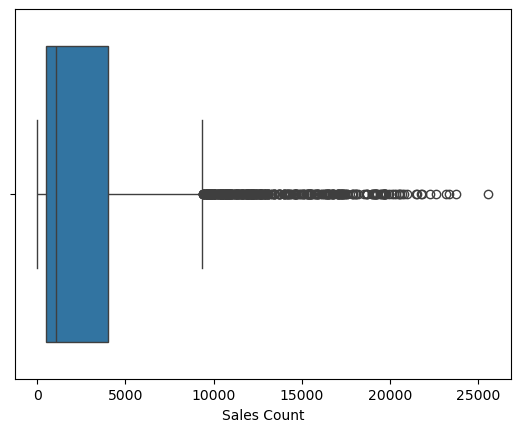

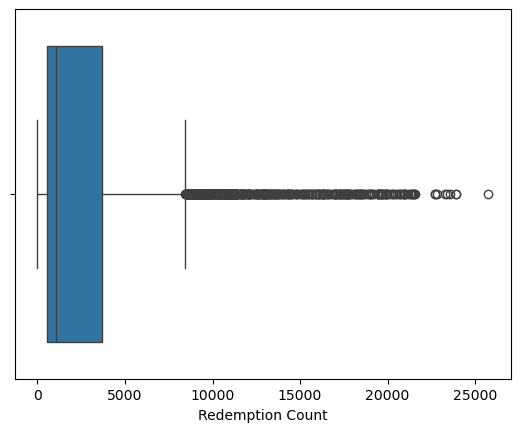

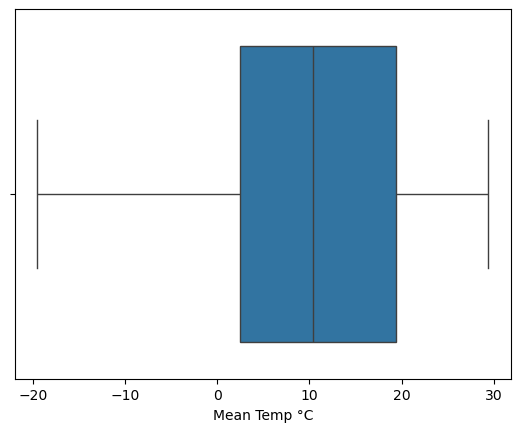

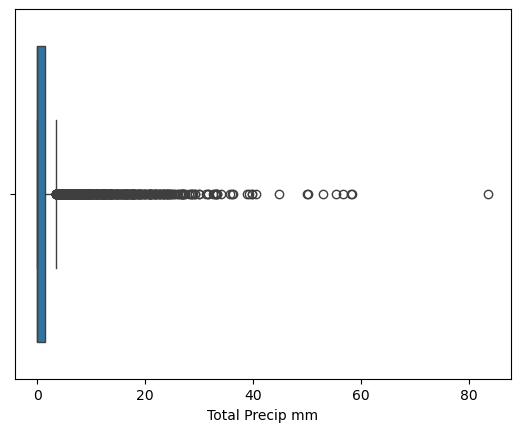

In [41]:
cols=['Sales Count', 'Redemption Count', 'Mean Temp °C', 'Total Precip mm']

for i in cols:
    sns.boxplot(x=full_df[i])
    plt.show()

### Plotting Distribution

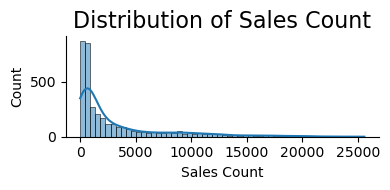

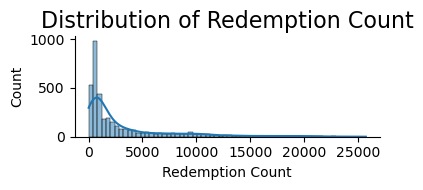

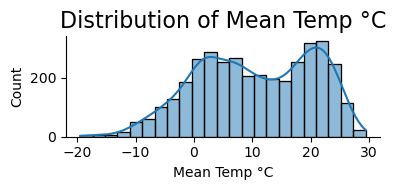

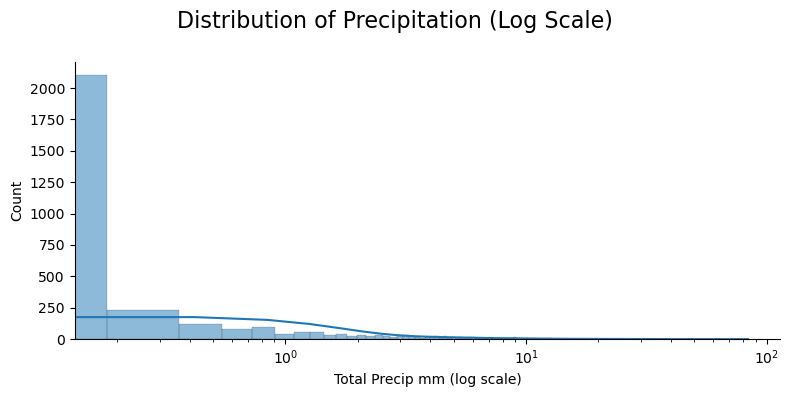

In [42]:
columns = ['Sales Count', 'Redemption Count', 'Mean Temp °C']

# Loop through each column and plot
for col in columns:
    sns.displot(full_df[col], kde=True, height=2, aspect=2)
    plt.title(f'Distribution of {col}', size=16)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

g = sns.displot(full_df['Total Precip mm'], kde=True, height=4, aspect=2)
g.set_axis_labels('Total Precip mm (log scale)', 'Count')
g.set(xscale='log')  #make x axis log scale
g.fig.suptitle('Distribution of Precipitation (Log Scale)', size=16)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.85)
plt.show()

## Exploratory Data Analysis

### Ferry Ticket Sales Trends Daily vs 15-Day Rolling Total

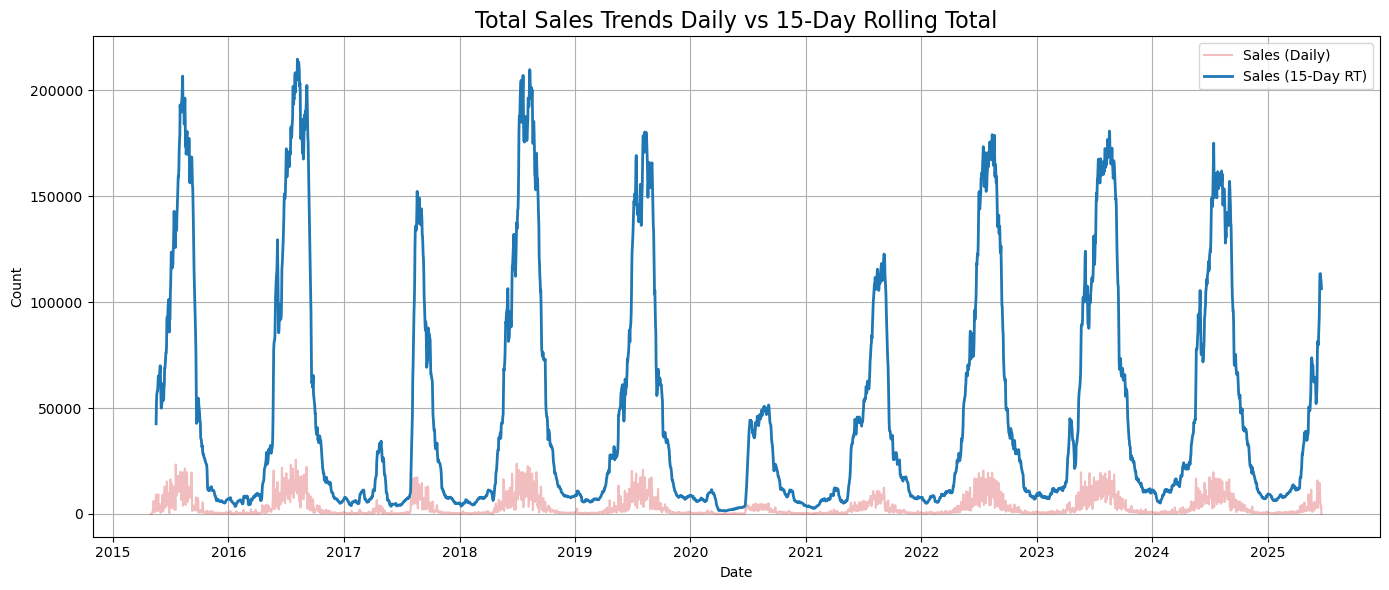

,Date,Redemption Count,Sales Count,Month-Year,Day Name,Week Type,Is Holiday,month,season,Mean Temp °C,Total Precip mm,month_name
0,2015-05-01,1,4,May-2015,Friday,Weekday,No,5,Spring,15.8,0.0,May
1,2015-05-04,12,75,May-2015,Monday,Weekday,No,5,Spring,17.2,0.3,May
2,2015-05-05,537,549,May-2015,Tuesday,Weekday,No,5,Spring,13.3,0.1,May
3,2015-05-06,989,1358,May-2015,Wednesday,Weekday,No,5,Spring,15.6,0.0,May
4,2015-05-07,1343,2170,May-2015,Thursday,Weekday,No,5,Spring,17.6,0.0,May


In [43]:
# Add rolling averages
full_df['Sales RT15'] = full_df['Sales Count'].rolling(window=15).sum()
full_df['Redemption RT15'] = full_df['Redemption Count'].rolling(window=15).sum()

# Plot original and smoothed lines
plt.figure(figsize=(14, 6))
plt.plot(full_df['Date'], full_df['Sales Count'], alpha=0.3, label='Sales (Daily)', color='tab:red')
plt.plot(full_df['Date'], full_df['Sales RT15'], label='Sales (15-Day RT)', color='tab:blue', linewidth=2)

plt.title('Total Sales Trends Daily vs 15-Day Rolling Total', fontsize=16)

plt.xlabel('Date')
# Format x-axis to show every 1 year
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))  # 1 year interval
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

full_df.drop(columns=["Redemption RT15", "Sales RT15"], inplace=True)
full_df.head()

### Ferry Ticket Sales Trends Daily vs 15-Day Rolling total

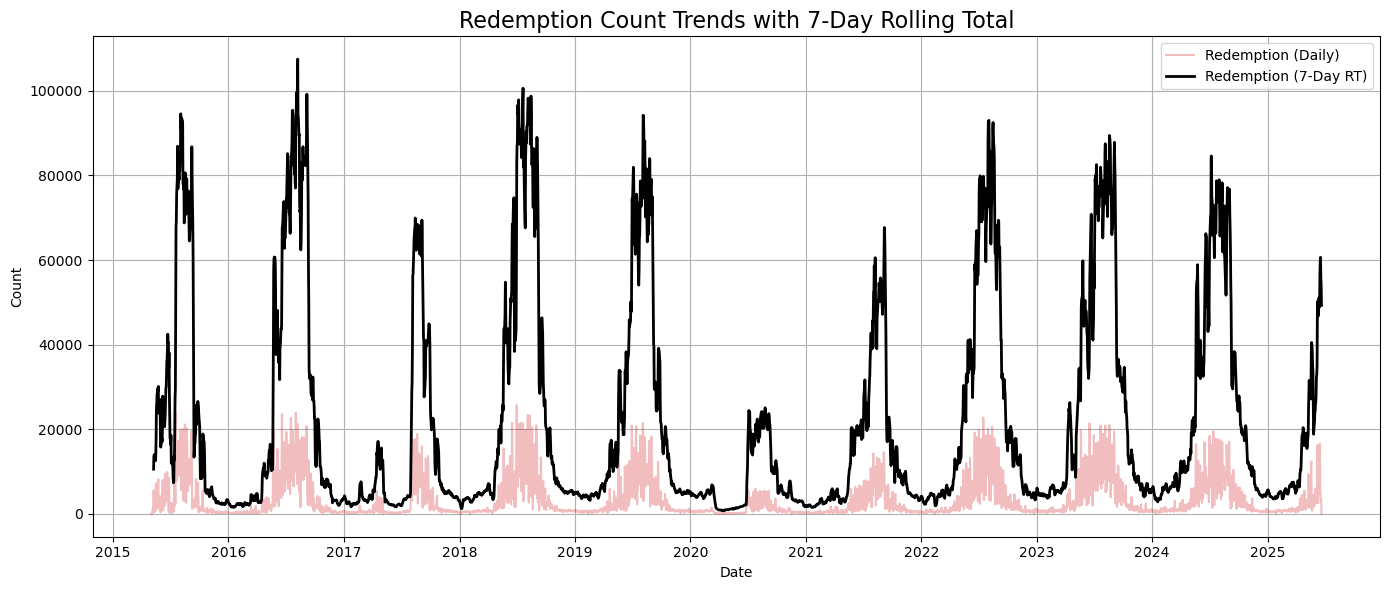

,Date,Redemption Count,Sales Count,Month-Year,Day Name,Week Type,Is Holiday,month,season,Mean Temp °C,Total Precip mm,month_name
0,2015-05-01,1,4,May-2015,Friday,Weekday,No,5,Spring,15.8,0.0,May
1,2015-05-04,12,75,May-2015,Monday,Weekday,No,5,Spring,17.2,0.3,May
2,2015-05-05,537,549,May-2015,Tuesday,Weekday,No,5,Spring,13.3,0.1,May
3,2015-05-06,989,1358,May-2015,Wednesday,Weekday,No,5,Spring,15.6,0.0,May
4,2015-05-07,1343,2170,May-2015,Thursday,Weekday,No,5,Spring,17.6,0.0,May


In [44]:
# Add rolling averages
full_df['Sales RT7'] = full_df['Sales Count'].rolling(window=7).sum()
full_df['Redemption RT7'] = full_df['Redemption Count'].rolling(window=7).sum()

# Plot original and smoothed lines
plt.figure(figsize=(14, 6))

plt.plot(full_df['Date'], full_df['Redemption Count'], alpha=0.3, label='Redemption (Daily)', color='tab:red')
plt.plot(full_df['Date'], full_df['Redemption RT7'], label='Redemption (7-Day RT)', color='black', linewidth=2)

plt.title('Redemption Count Trends with 7-Day Rolling Total', fontsize=16)

plt.xlabel('Date')
# Format x-axis to show every 1 year
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))  # 1 year interval
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

full_df.drop(columns=["Redemption RT7", "Sales RT7"], inplace=True)
full_df.head()

### Line Plot for Average Monthly Ticket Sales Count (2015-2020)

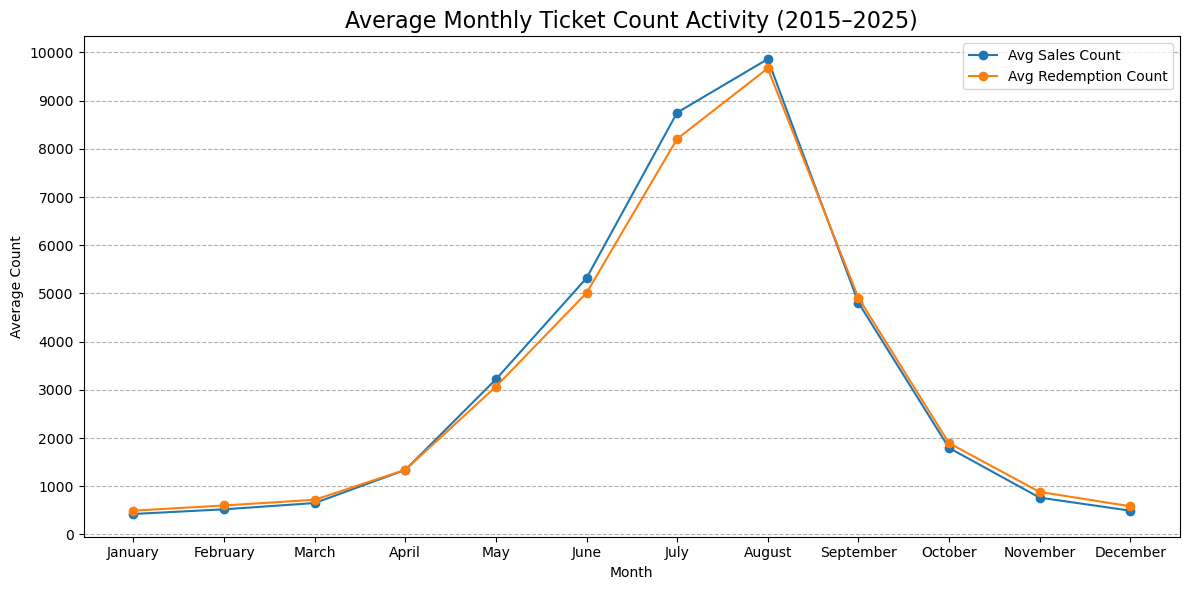

In [46]:

# Group by month only (average across all years)
monthly_avg = full_df.groupby('month_name')[['Sales Count', 'Redemption Count']].mean().reset_index()

# Preserve calendar month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg['month_name'] = pd.Categorical(monthly_avg['month_name'], categories=month_order, ordered=True)
monthly_avg = monthly_avg.sort_values('month_name')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg['month_name'], monthly_avg['Sales Count'], marker='o', label='Avg Sales Count')
plt.plot(monthly_avg['month_name'], monthly_avg['Redemption Count'], marker='o', label='Avg Redemption Count')
plt.title('Average Monthly Ticket Count Activity (2015–2025)', fontsize=16)
plt.ylabel('Average Count')
plt.yticks(range(0, int(monthly_avg[['Sales Count', 'Redemption Count']].values.max()) + 1000, 1000))
plt.xlabel('Month')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

### Total Tickets Sold Each Year

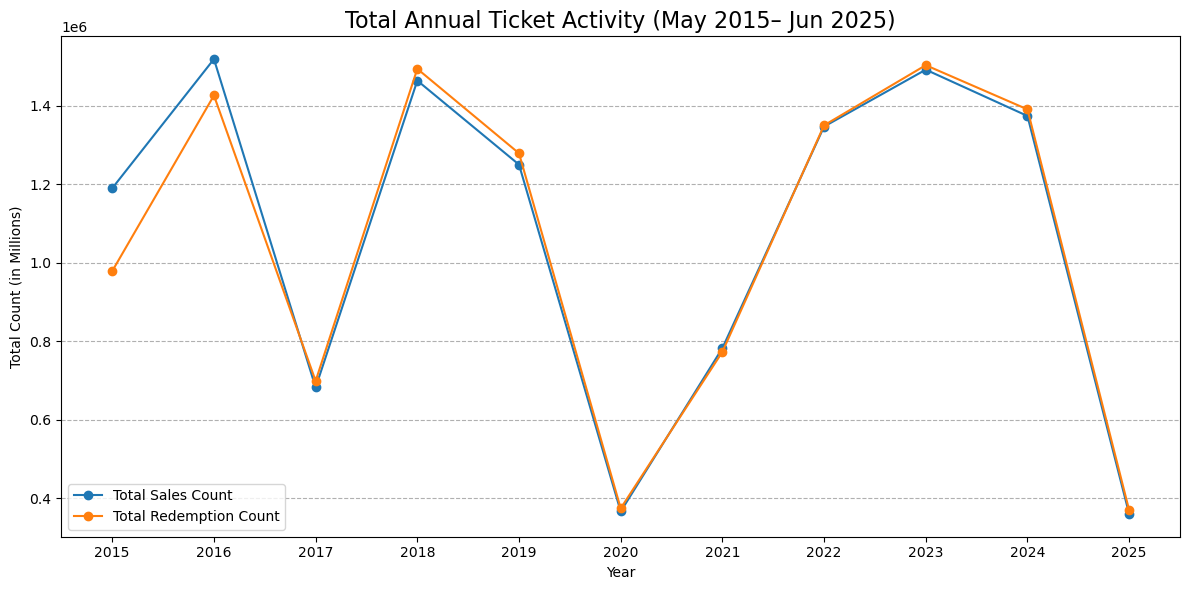

In [38]:
# Ensure 'Date' column is in datetime format
full_df['Date'] = pd.to_datetime(full_df['Date'])

# Extract year
full_df['Year'] = full_df['Date'].dt.year

# Group by year and sum
yearly_sum = full_df.groupby('Year')[['Sales Count', 'Redemption Count']].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(yearly_sum['Year'], yearly_sum['Sales Count'], marker='o', label='Total Sales Count')
plt.plot(yearly_sum['Year'], yearly_sum['Redemption Count'], marker='o', label='Total Redemption Count')

plt.title('Total Annual Ticket Activity (May 2015– Jun 2025)', fontsize=16)
plt.ylabel('Total Count (in Millions)')
plt.xlabel('Year')
plt.xticks(yearly_sum['Year'])  # Ensure all years are shown
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


### Line Plot for Avg. Ticket Activity by Day of the week (2015-2025)

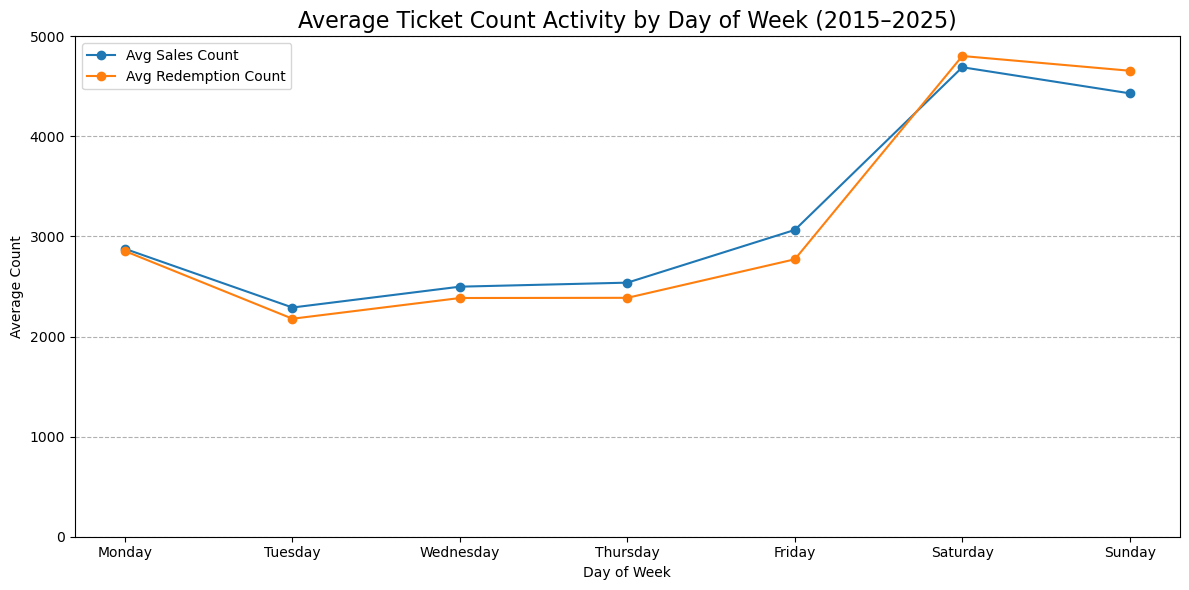

In [47]:
# Group by day name and calculate average
daily_avg = full_df.groupby('Day Name')[['Sales Count', 'Redemption Count']].mean().reset_index()

# Preserve calendar weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_avg['Day Name'] = pd.Categorical(daily_avg['Day Name'], categories=weekday_order, ordered=True)
daily_avg = daily_avg.sort_values('Day Name')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(daily_avg['Day Name'], daily_avg['Sales Count'], marker='o', label='Avg Sales Count')
plt.plot(daily_avg['Day Name'], daily_avg['Redemption Count'], marker='o', label='Avg Redemption Count')
plt.title('Average Ticket Count Activity by Day of Week (2015–2025)', fontsize=16)
plt.ylabel('Average Count')
plt.yticks(range(0, int(daily_avg[['Sales Count', 'Redemption Count']].values.max()) + 1000, 1000))
plt.xlabel('Day of Week')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

### Line Plot for Total Tickets Sold each month (2015-2020)

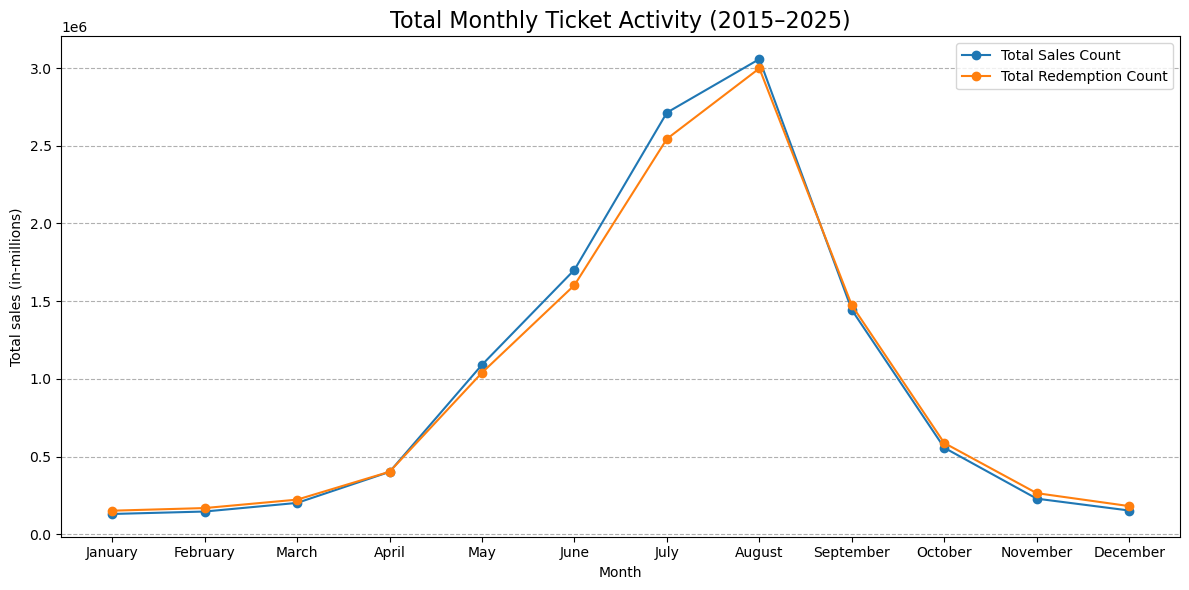

In [95]:
# Add numeric month and month name


# Group by month only, and get SUM instead of mean
monthly_sum = full_df.groupby('month_name')[['Sales Count', 'Redemption Count']].sum().reset_index()

# Calendar month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_sum['month_name'] = pd.Categorical(monthly_sum['month_name'], categories=month_order, ordered=True)
monthly_sum = monthly_sum.sort_values('month_name')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_sum['month_name'], monthly_sum['Sales Count'], marker='o', label='Total Sales Count')
plt.plot(monthly_sum['month_name'], monthly_sum['Redemption Count'], marker='o', label='Total Redemption Count')
plt.title('Total Monthly Ticket Activity (2015–2025)', fontsize=16)
plt.ylabel('Total sales (in-millions)')
plt.xlabel('Month')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

### Sales Count Decomposition 

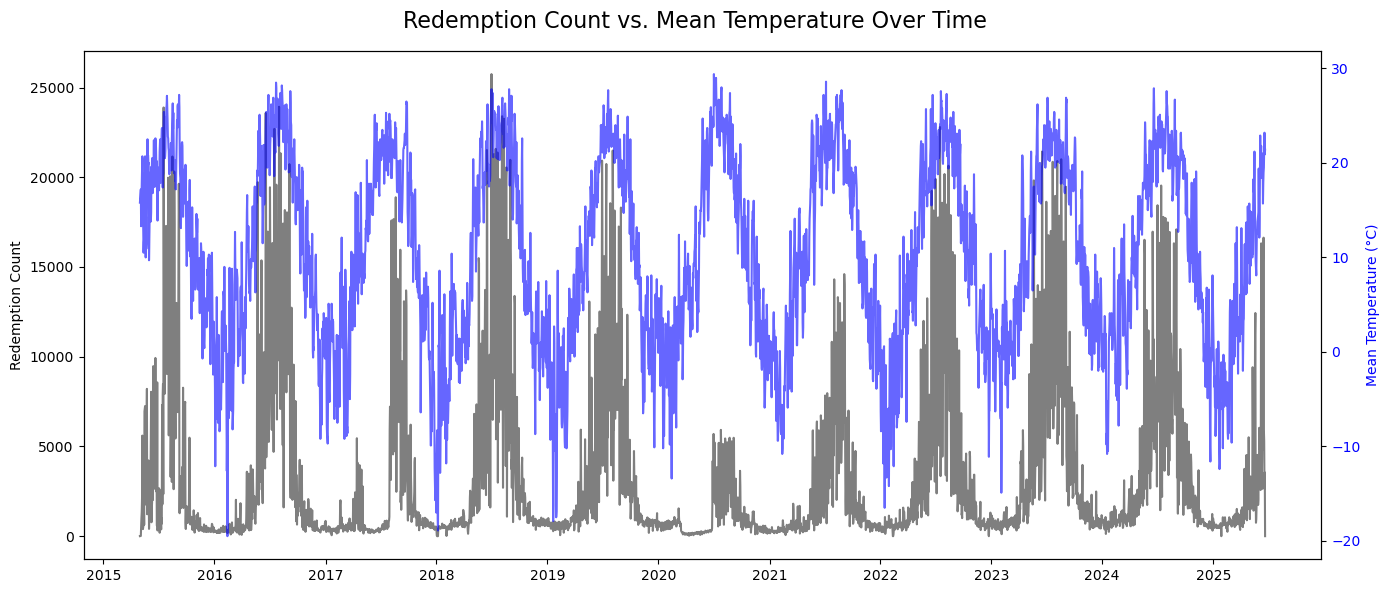

In [49]:
fig, ax1 = plt.subplots(figsize=(14, 6))

ax1.plot(full_df['Date'], full_df['Redemption Count'], color='tab:gray', label='Redemption Count')
ax1.set_ylabel('Redemption Count', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax1.xaxis.set_major_locator(mdates.YearLocator(1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax2 = ax1.twinx()
ax2.plot(full_df['Date'], full_df['Mean Temp °C'], color='blue', alpha=0.6, label='Mean Temp (°C)')
ax2.set_ylabel('Mean Temperature (°C)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')


fig.suptitle('Redemption Count vs. Mean Temperature Over Time', fontsize=16)
fig.tight_layout()
plt.show()

### Plot to check Redemption Count with respect to Temperature

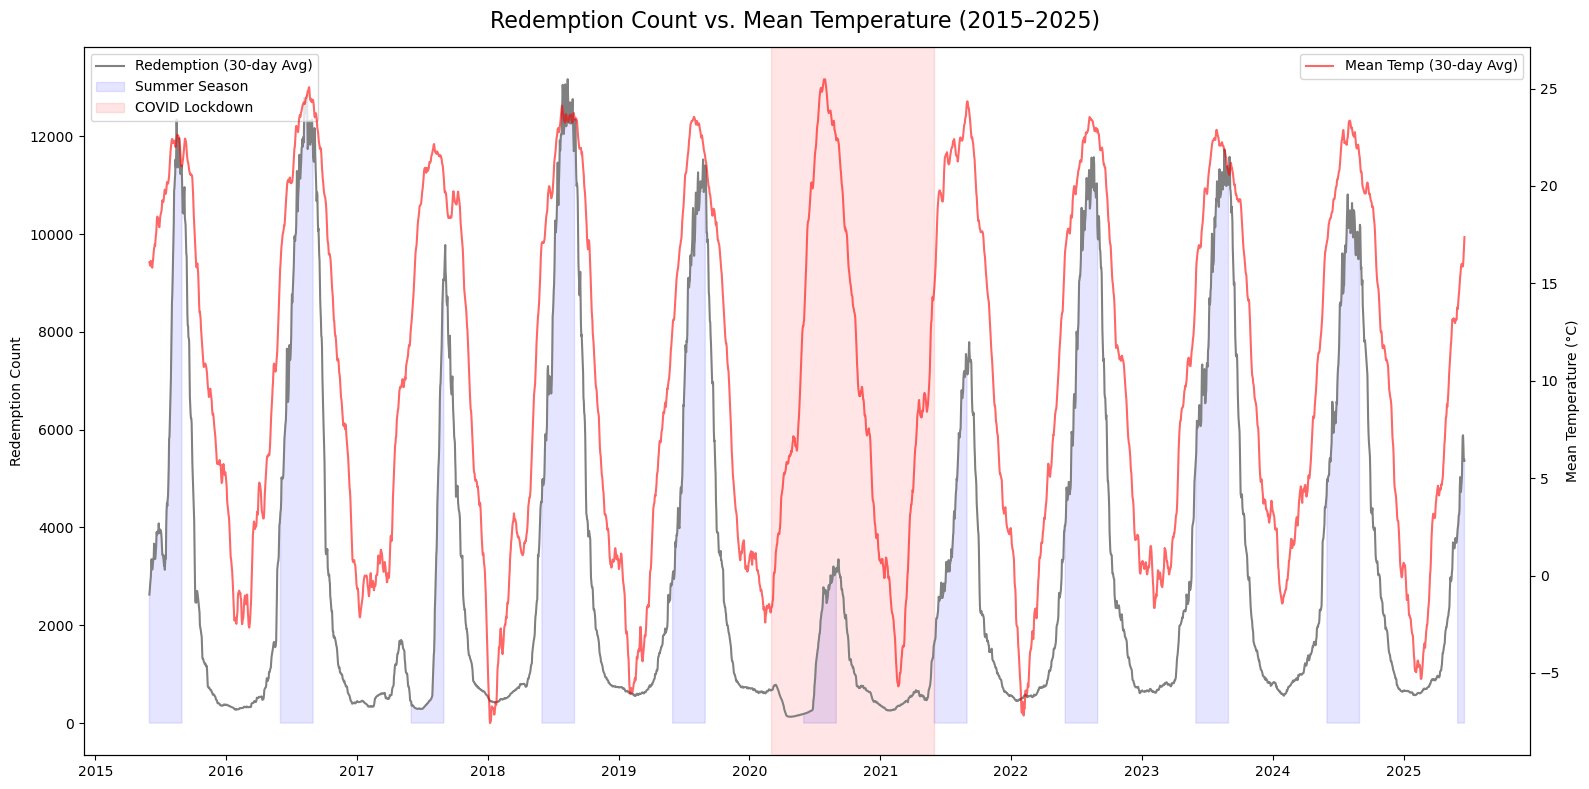

,Date,Redemption Count,Sales Count,Month-Year,Day Name,Week Type,Is Holiday,month,season,Mean Temp °C,Total Precip mm,month_name
0,2015-05-01,1,4,May-2015,Friday,Weekday,No,5,Spring,15.8,0.0,May
1,2015-05-04,12,75,May-2015,Monday,Weekday,No,5,Spring,17.2,0.3,May
2,2015-05-05,537,549,May-2015,Tuesday,Weekday,No,5,Spring,13.3,0.1,May
3,2015-05-06,989,1358,May-2015,Wednesday,Weekday,No,5,Spring,15.6,0.0,May
4,2015-05-07,1343,2170,May-2015,Thursday,Weekday,No,5,Spring,17.6,0.0,May


In [50]:
# Rolling averages
full_df['Redemption_Rolling'] = full_df['Redemption Count'].rolling(window=30).mean()
full_df['Temp_Rolling'] = full_df['Mean Temp °C'].rolling(window=30).mean()

# Summer months
summer_mask = full_df['Date'].dt.month.isin([6, 7, 8])

# Create figure
fig, ax1 = plt.subplots(figsize=(16, 8))

# Redemption line
ax1.plot(full_df['Date'], full_df['Redemption_Rolling'], color='gray', label='Redemption (30-day Avg)')
ax1.set_ylabel('Redemption Count', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Summer shading
ax1.fill_between(full_df['Date'], full_df['Redemption_Rolling'],
                 where=summer_mask,
                 color='blue', alpha=0.1, label='Summer Season')

# COVID lockdown period (March 2020 to June 2021)
ax1.axvspan(pd.Timestamp('2020-03-01'), pd.Timestamp('2021-06-01'),
            color='red', alpha=0.1, label='COVID Lockdown')

# X-axis: Yearly
ax1.xaxis.set_major_locator(mdates.YearLocator(1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Temperature line (secondary y-axis)
ax2 = ax1.twinx()
ax2.plot(full_df['Date'], full_df['Temp_Rolling'], color='red', alpha=0.6, label='Mean Temp (30-day Avg)')
ax2.set_ylabel('Mean Temperature (°C)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Title & cleanup
fig.suptitle('Redemption Count vs. Mean Temperature (2015–2025)', fontsize=16)
fig.tight_layout()

ax1.grid(False)
ax2.grid(False)

# Temperature axis legend (right)
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines2, labels2, loc='upper right')

# Redemption axis legend (left)
lines1, labels1 = ax1.get_legend_handles_labels()
ax1.legend(lines1, labels1, loc='upper left')

plt.show()

full_df.drop(columns=["Redemption_Rolling","Temp_Rolling"], inplace=True)
full_df.head()

### Plot to check Sales Count with respect to Temperature

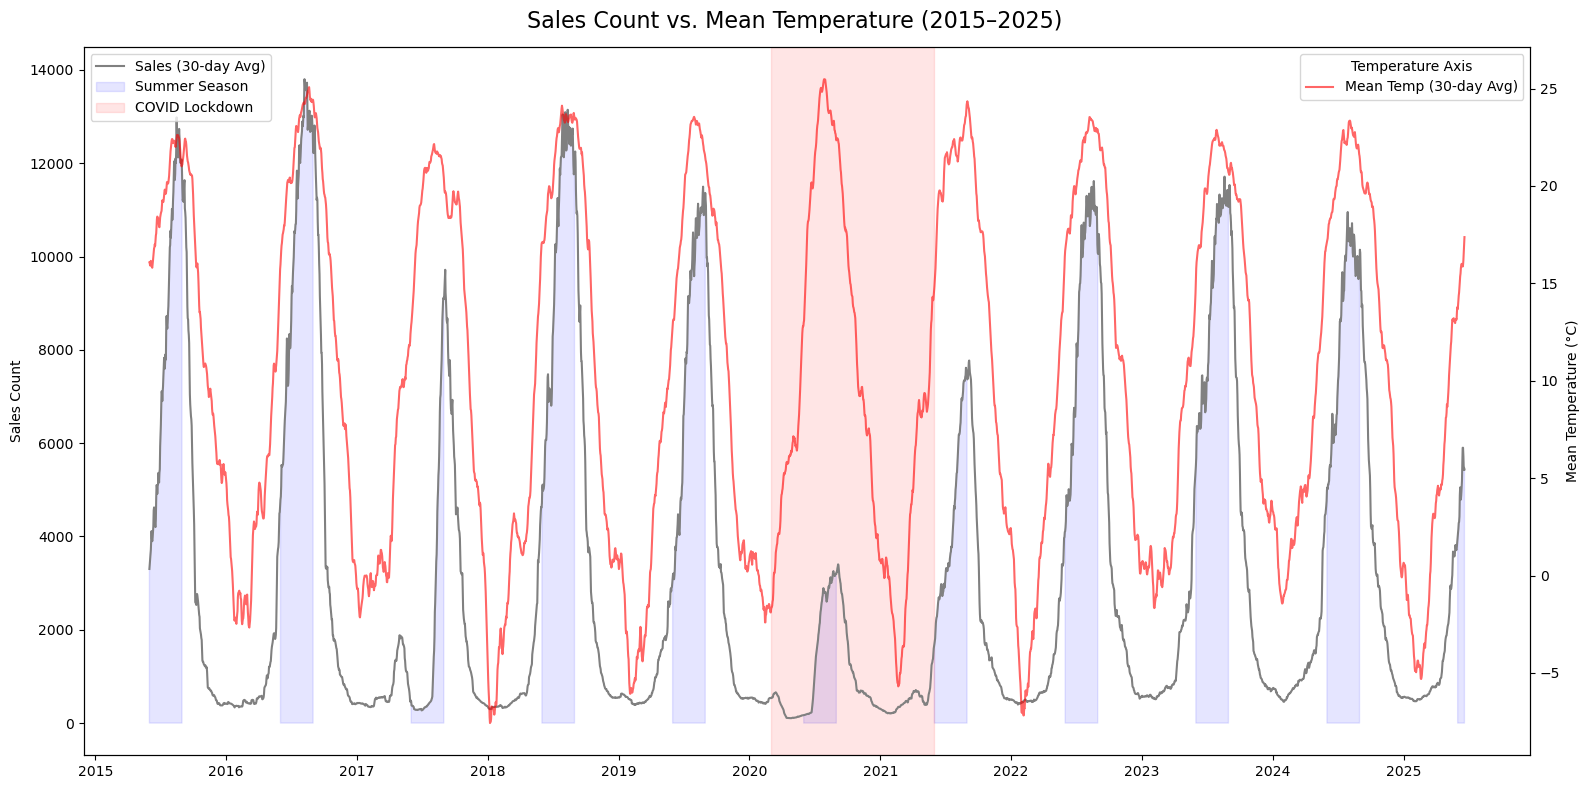

,Date,Redemption Count,Sales Count,Month-Year,Day Name,Week Type,Is Holiday,month,season,Mean Temp °C,Total Precip mm,month_name
0,2015-05-01,1,4,May-2015,Friday,Weekday,No,5,Spring,15.8,0.0,May
1,2015-05-04,12,75,May-2015,Monday,Weekday,No,5,Spring,17.2,0.3,May
2,2015-05-05,537,549,May-2015,Tuesday,Weekday,No,5,Spring,13.3,0.1,May
3,2015-05-06,989,1358,May-2015,Wednesday,Weekday,No,5,Spring,15.6,0.0,May
4,2015-05-07,1343,2170,May-2015,Thursday,Weekday,No,5,Spring,17.6,0.0,May


In [51]:
# Rolling averages
full_df['Sales_Rolling'] = full_df['Sales Count'].rolling(window=30).mean()
full_df['Temp_Rolling'] = full_df['Mean Temp °C'].rolling(window=30).mean()

# Summer months
summer_mask = full_df['Date'].dt.month.isin([6, 7, 8])

# Create figure
fig, ax1 = plt.subplots(figsize=(16, 8))

# Sales Count line
ax1.plot(full_df['Date'], full_df['Sales_Rolling'], color='gray', label='Sales (30-day Avg)')
ax1.set_ylabel('Sales Count', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Summer shading
ax1.fill_between(full_df['Date'], full_df['Sales_Rolling'],
                 where=summer_mask,
                 color='blue', alpha=0.1, label='Summer Season')

# COVID lockdown period (March 2020 to June 2021)
ax1.axvspan(pd.Timestamp('2020-03-01'), pd.Timestamp('2021-06-01'),
            color='red', alpha=0.1, label='COVID Lockdown')

# X-axis: Yearly
ax1.xaxis.set_major_locator(mdates.YearLocator(1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Temperature line (secondary y-axis)
ax2 = ax1.twinx()
ax2.plot(full_df['Date'], full_df['Temp_Rolling'], color='red', alpha=0.6, label='Mean Temp (30-day Avg)')
ax2.set_ylabel('Mean Temperature (°C)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Title & cleanup
fig.suptitle('Sales Count vs. Mean Temperature (2015–2025)', fontsize=16)
fig.tight_layout()

# Remove grid
ax1.grid(False)
ax2.grid(False)

# Legends
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines2, labels2, loc='upper right', title='Temperature Axis')

lines1, labels1 = ax1.get_legend_handles_labels()
ax1.legend(lines1, labels1, loc='upper left')

plt.show()

full_df.drop(columns=["Temp_Rolling","Sales_Rolling"], inplace=True)
full_df.head()

### Time Series Decomposition

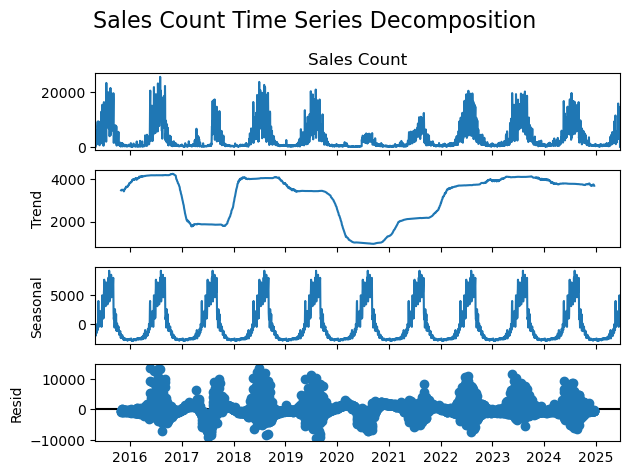

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Resample daily total 
daily_sales = full_df.set_index('Date').resample('D')['Sales Count'].sum()

# Decompose (additive better because of steady seasonality)
result = seasonal_decompose(daily_sales, model='additive', period=365)

# Plot decomposition
result.plot()
plt.suptitle('Sales Count Time Series Decomposition', fontsize=16)
plt.tight_layout()
plt.show()

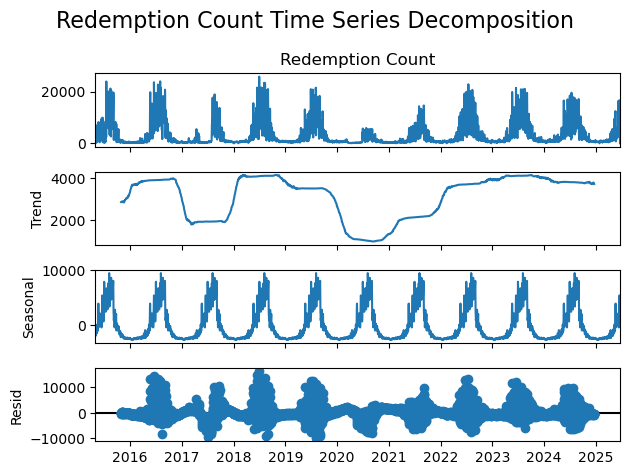

In [53]:
# Daily total Redemption Count
daily_redemption = full_df.set_index('Date').resample('D')['Redemption Count'].sum()

# Decomposition (Additive Model)
result = seasonal_decompose(daily_redemption, model='additive', period=365)

# Plot components
result.plot()
plt.suptitle('Redemption Count Time Series Decomposition', fontsize=16)
plt.tight_layout()
plt.show()

### Check for Correlation

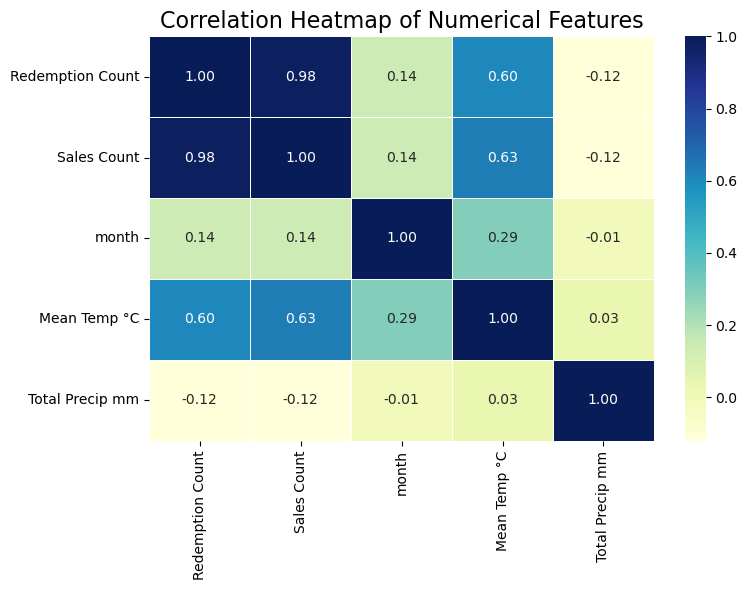

In [54]:
# Select only numeric columns
numeric_cols = full_df.select_dtypes(include=['number', 'int32', 'int64', 'float'])

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Set up the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

### Weekend Vs Weekday analysis

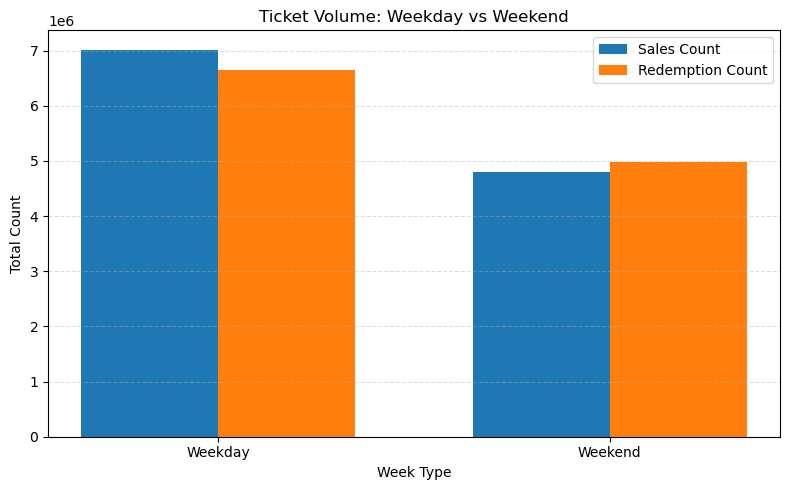

In [94]:
# Group by Week Type and sum
ticket_summary = full_df.groupby('Week Type')[['Sales Count', 'Redemption Count']].sum().reset_index()

# Set plotting order
ticket_summary = ticket_summary.set_index('Week Type').loc[['Weekday', 'Weekend']].reset_index()

# Plot
plt.figure(figsize=(8, 5))
bar_width = 0.35
x = range(len(ticket_summary))

plt.bar(x, ticket_summary['Sales Count'], width=bar_width, label='Sales Count')
plt.bar([i + bar_width for i in x], ticket_summary['Redemption Count'], width=bar_width, label='Redemption Count')

plt.xticks([i + bar_width / 2 for i in x], ticket_summary['Week Type'])
plt.title('Ticket Volume: Weekday vs Weekend')
plt.xlabel('Week Type')
plt.ylabel('Total Count')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

### Barplot showing Sales and Redemption Count by Season

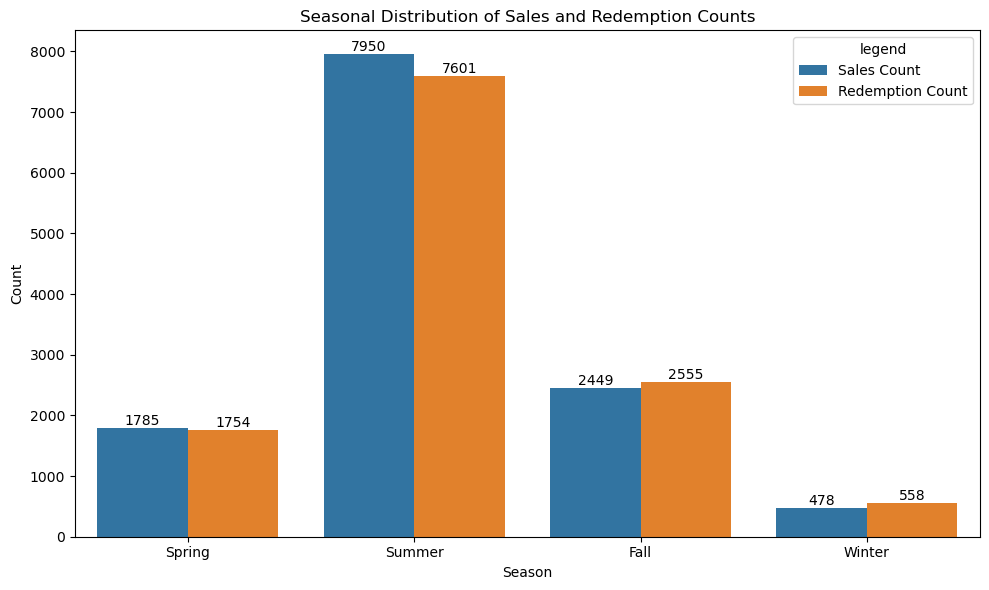

,Date,Redemption Count,Sales Count,Month-Year,Day Name,Week Type,Is Holiday,month,season,Mean Temp °C,Total Precip mm,month_name
0,2015-05-01,1,4,May-2015,Friday,Weekday,No,5,Spring,15.8,0.0,May
1,2015-05-04,12,75,May-2015,Monday,Weekday,No,5,Spring,17.2,0.3,May
2,2015-05-05,537,549,May-2015,Tuesday,Weekday,No,5,Spring,13.3,0.1,May
3,2015-05-06,989,1358,May-2015,Wednesday,Weekday,No,5,Spring,15.6,0.0,May
4,2015-05-07,1343,2170,May-2015,Thursday,Weekday,No,5,Spring,17.6,0.0,May


In [55]:
# Reshape the data 
melted_df = pd.melt(
    full_df,
    id_vars='season',
    value_vars=['Sales Count', 'Redemption Count'],
    var_name='legend',
    value_name='Count'
)

# Define chronological season order
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

# Create barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=melted_df,
    x='season',
    y='Count',
    hue='legend',
    order=season_order,
    errorbar= None
)

#Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=10)

plt.title('Seasonal Distribution of Sales and Redemption Counts')
plt.xlabel('Season')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
full_df.head()

### Ferry Ticket Sales Trends: Weekday vs Weekend

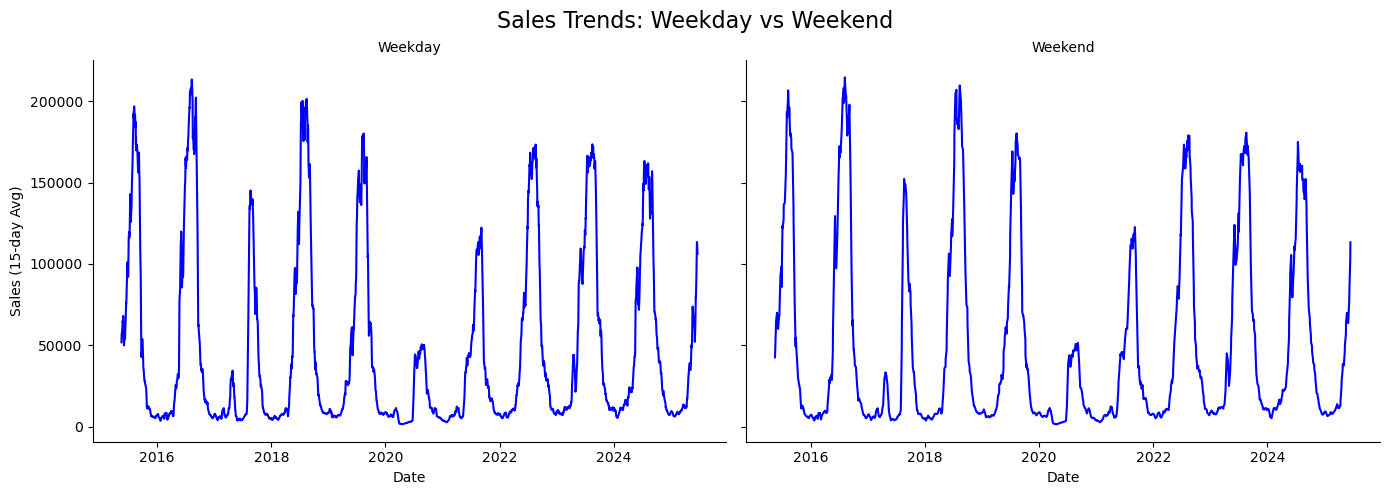

,Date,Redemption Count,Sales Count,Month-Year,Day Name,Week Type,Is Holiday,month,season,Mean Temp °C,Total Precip mm,month_name,Day Type
0,2015-05-01,1,4,May-2015,Friday,Weekday,No,5,Spring,15.8,0.0,May,Weekday
1,2015-05-04,12,75,May-2015,Monday,Weekday,No,5,Spring,17.2,0.3,May,Weekday
2,2015-05-05,537,549,May-2015,Tuesday,Weekday,No,5,Spring,13.3,0.1,May,Weekday
3,2015-05-06,989,1358,May-2015,Wednesday,Weekday,No,5,Spring,15.6,0.0,May,Weekday
4,2015-05-07,1343,2170,May-2015,Thursday,Weekday,No,5,Spring,17.6,0.0,May,Weekday


In [56]:
# Create weekend/weekday column
full_df['Day Type'] = full_df['Date'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Smooth with 15-day rolling total
full_df['Sales_Rolling'] = full_df['Sales Count'].rolling(15).sum()

# Plot with seaborn's facet grid
g = sns.FacetGrid(full_df, col='Day Type', height=5, aspect=1.4, sharey=True)
g.map_dataframe(sns.lineplot, x='Date', y='Sales_Rolling', color='blue')
g.set_axis_labels('Date', 'Sales (15-day Avg)')
g.set_titles('{col_name}')
g.fig.suptitle('Sales Trends: Weekday vs Weekend', fontsize=16)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.88)

# Remove x-axis grid lines
for ax in g.axes.flat:
    ax.grid(False, axis='x')

plt.show()

full_df.drop(columns=["Sales_Rolling"], inplace=True)
full_df.head()

### Monthly Sales Distribution: Holiday vs Non-Holiday Impact on Ferry Tickets

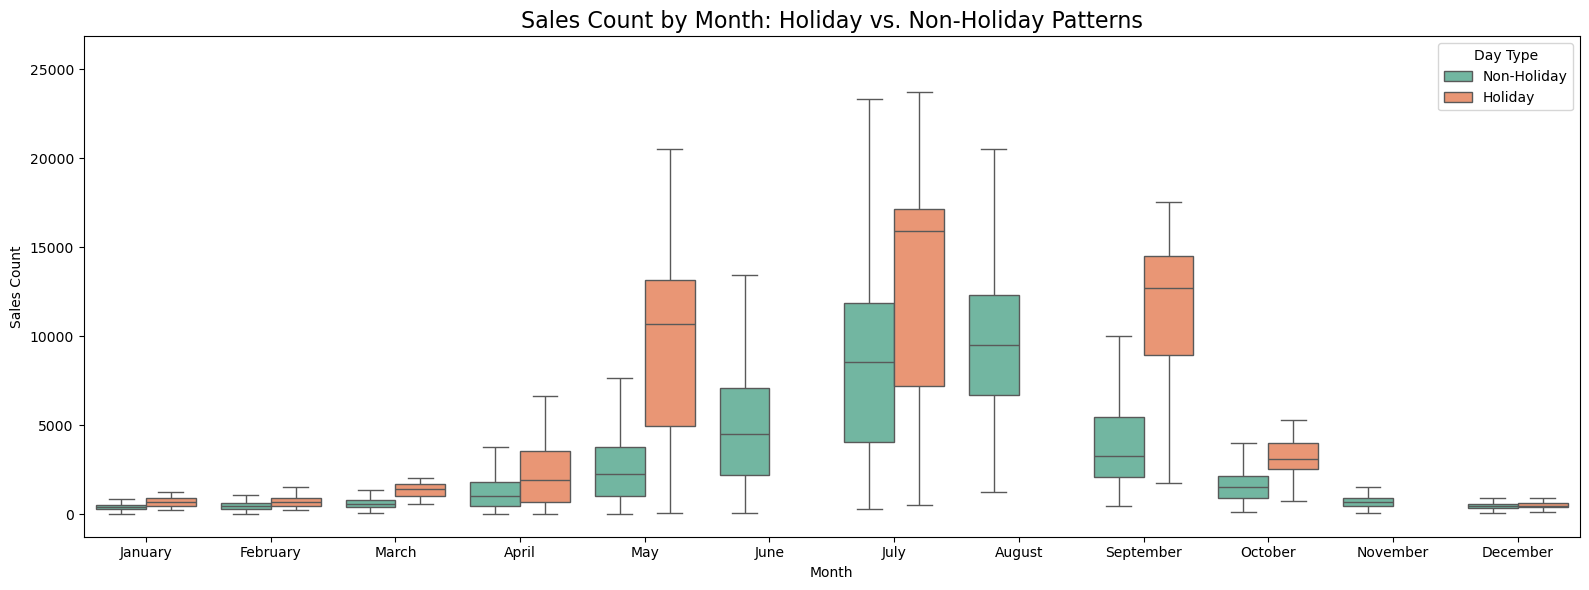

,Date,Redemption Count,Sales Count,Month-Year,Day Name,Week Type,Is Holiday,month,season,Mean Temp °C,Total Precip mm,month_name,Day Type,Month
0,2015-05-01,1,4,May-2015,Friday,Weekday,No,5,Spring,15.8,0.0,May,Weekday,May
1,2015-05-04,12,75,May-2015,Monday,Weekday,No,5,Spring,17.2,0.3,May,Weekday,May
2,2015-05-05,537,549,May-2015,Tuesday,Weekday,No,5,Spring,13.3,0.1,May,Weekday,May
3,2015-05-06,989,1358,May-2015,Wednesday,Weekday,No,5,Spring,15.6,0.0,May,Weekday,May
4,2015-05-07,1343,2170,May-2015,Thursday,Weekday,No,5,Spring,17.6,0.0,May,Weekday,May


In [57]:
# Ensure datetime
full_df['Date'] = pd.to_datetime(full_df['Date'])

# Create Month column
full_df['Month'] = full_df['Date'].dt.strftime('%B')  # Full month name
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
full_df['Month'] = pd.Categorical(full_df['Month'], categories=month_order, ordered=True)

# Normalize holiday indicator
full_df['Holiday_Label'] = full_df['Is Holiday'].apply(lambda x: 'Holiday' if str(x).lower() == 'yes' else 'Non-Holiday')

# Filter to non-zero Sales Count
filtered = full_df[full_df['Sales Count'] > 0]

# Plot
plt.figure(figsize=(16, 6))
sns.boxplot(data=filtered, x='Month', y='Sales Count', hue='Holiday_Label',
            palette='Set2', fliersize=0)


plt.title('Sales Count by Month: Holiday vs. Non-Holiday Patterns', fontsize=16)
plt.ylabel('Sales Count')
plt.xlabel('Month')
plt.legend(title='Day Type', loc='upper right')
plt.tight_layout()
plt.show()

full_df.drop(columns=["Holiday_Label"], inplace=True)
full_df.head()

### Weather-Driven Ticket Activity: Temperature and Rain Impact on Redemptions

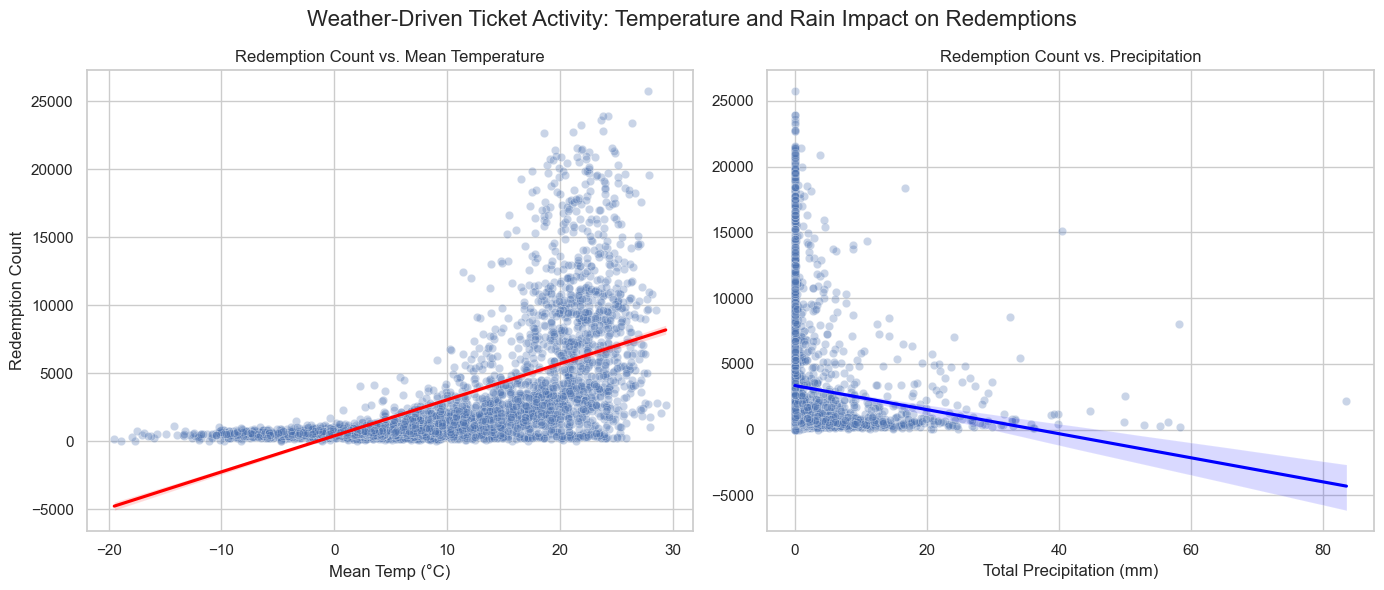

In [62]:

# Set plot style
sns.set(style="whitegrid")

# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Temp vs Redemption
sns.scatterplot(data= full_df, x='Mean Temp °C', y='Redemption Count',
                alpha=0.3, ax=axes[0])
sns.regplot(data= full_df, x='Mean Temp °C', y='Redemption Count',
            scatter=False, color='red', ax=axes[0])
axes[0].set_title('Redemption Count vs. Mean Temperature')
axes[0].set_xlabel('Mean Temp (°C)')
axes[0].set_ylabel('Redemption Count')

# Precip vs Redemption
sns.scatterplot(data=full_df, x='Total Precip mm', y='Redemption Count',
                alpha=0.3, ax=axes[1])
sns.regplot(data=full_df, x='Total Precip mm', y='Redemption Count',
            scatter=False, color='blue', ax=axes[1])
axes[1].set_title('Redemption Count vs. Precipitation')
axes[1].set_xlabel('Total Precipitation (mm)')
axes[1].set_ylabel('')

# Layout & show
fig.suptitle('Weather-Driven Ticket Activity: Temperature and Rain Impact on Redemptions', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

### How Weather Affects Ferry Ticket Activity: Redemptions by Temperature, Sales by Rainfall

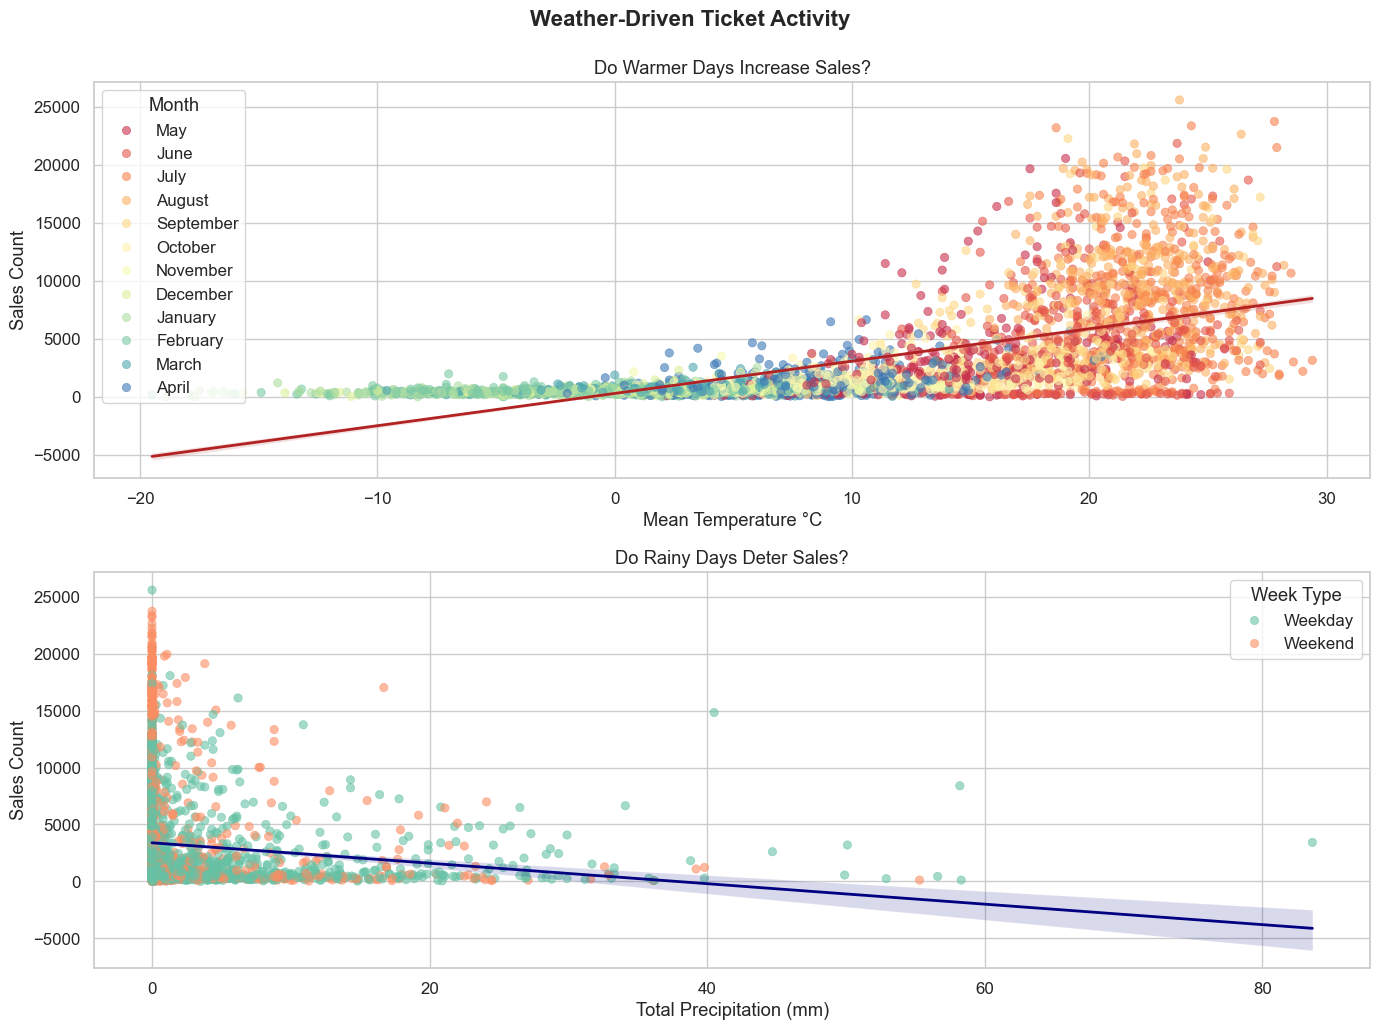

In [64]:


# Setup visual style
sns.set(style="whitegrid", font_scale=1.1)

fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=False)

# --- Plot 1: Redemptions vs. Temperature (hue by 'month_name') ---
sns.scatterplot(
    data= full_df, x='Mean Temp °C', y='Sales Count',
    hue='month_name', palette='Spectral', alpha=0.6, edgecolor=None, ax=axes[0]
)
sns.regplot(
    data= full_df, x='Mean Temp °C', y='Sales Count',
    scatter=False, color='firebrick', ax=axes[0], line_kws={"lw":2}
)
axes[0].set_title("Do Warmer Days Increase Sales?")
axes[0].set_ylabel("Sales Count")
axes[0].set_xlabel("Mean Temperature °C")
axes[0].legend(title="Month")

# --- Plot 2: Sales vs. Rainfall (hue by Week Type) ---
sns.scatterplot(
    data=full_df, x='Total Precip mm', y='Sales Count',
    hue='Week Type', palette='Set2', alpha=0.6, edgecolor=None, ax=axes[1]
)
sns.regplot(
    data= full_df, x='Total Precip mm', y='Sales Count',
    scatter=False, color='navy', ax=axes[1], line_kws={"lw":2}
)
axes[1].set_title("Do Rainy Days Deter Sales?")
axes[1].set_ylabel("Sales Count")
axes[1].set_xlabel("Total Precipitation (mm)")
axes[1].legend(title="Week Type")

plt.tight_layout()
plt.suptitle("Weather-Driven Ticket Activity", fontsize=16, fontweight='bold', y=1.03)
plt.show()


### Sales with Holiday days

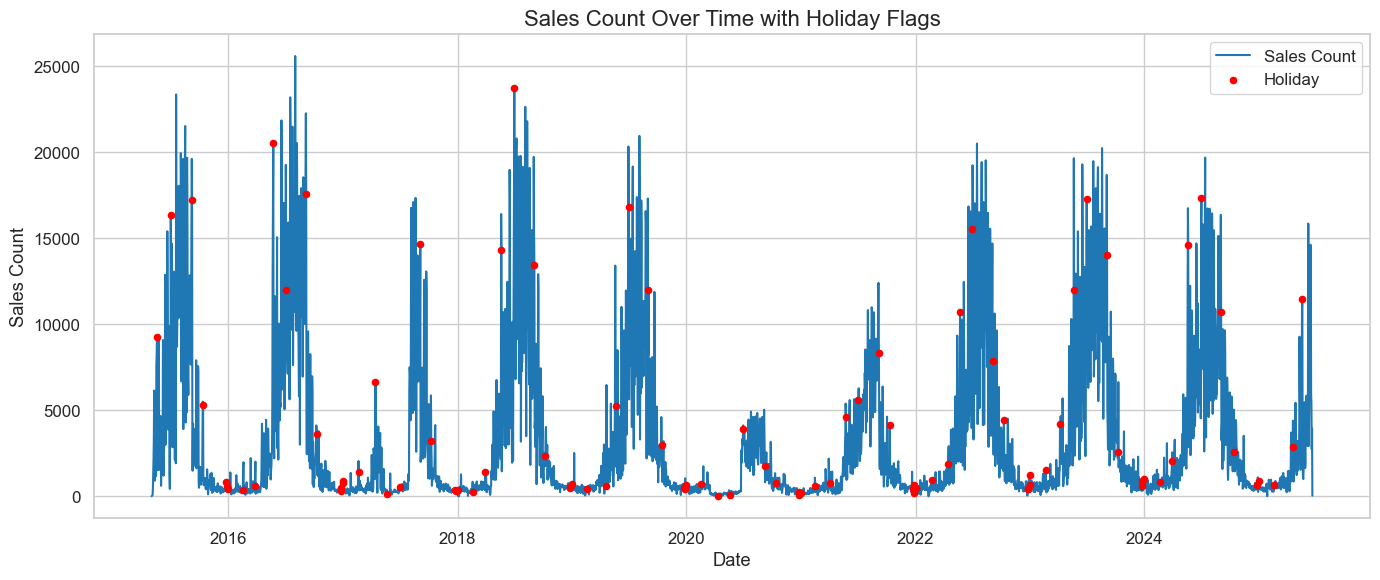

In [65]:
# Filter for holiday rows correctly
holiday_df = full_df[full_df['Is Holiday'].str.lower() == 'yes']  # Change to 'holiday' if needed

# Plot
plt.figure(figsize=(14, 6))
plt.plot(full_df['Date'], full_df['Sales Count'], label='Sales Count', color='tab:blue')

# Overlay holidays
plt.scatter(holiday_df['Date'], holiday_df['Sales Count'],
            color='red', label='Holiday', zorder=5, s=20)

# Labels and grid
plt.title('Sales Count Over Time with Holiday Flags', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Sales Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



### WHAT TIME OF THE DAY DO PEOPLE PURCHASE TICKETS THE MOST?
* used 3 hour interval data

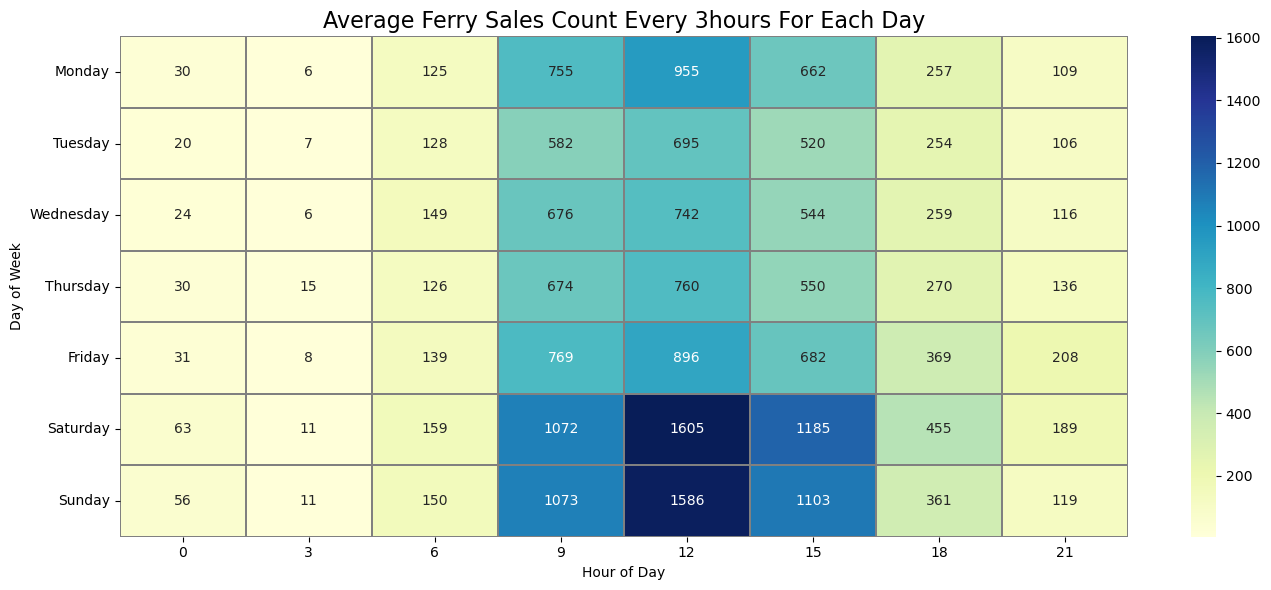

In [83]:


# --- Load Data ---
df = pd.read_excel("ferry_data_3hour.xlsx")

# --- Ensure datetime format ---
df['Date'] = pd.to_datetime(df['Date'])

# --- Extract day name and hour ---
df['Day of Week'] = df['Date'].dt.day_name()
df['Hour'] = df['Date'].dt.hour

# --- Group by day and hour ---
pivot_df = df.groupby(['Day of Week', 'Hour'])['Sales Count'].mean().reset_index()

# --- Pivot for heatmap ---
heatmap_data = pivot_df.pivot(index='Day of Week', columns='Hour', values='Sales Count')

# --- Ensure correct weekday order ---
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

# --- Plot heatmap ---
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.3, linecolor='gray', annot=True, fmt=".0f")

plt.title('Average Ferry Sales Count Every 3hours For Each Day', fontsize=16)
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

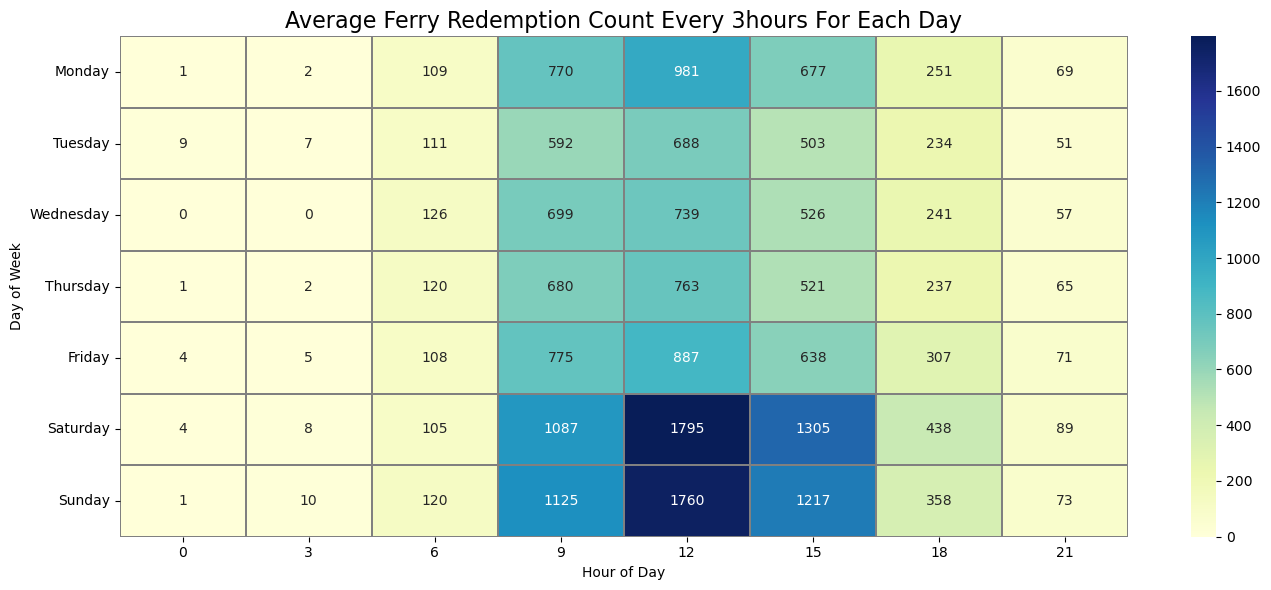

In [85]:
# --- Group by day and hour ---
pivot_df = df.groupby(['Day of Week', 'Hour'])['Redemption Count'].mean().reset_index()

# --- Pivot for heatmap ---
heatmap_data = pivot_df.pivot(index='Day of Week', columns='Hour', values='Redemption Count')

# --- Ensure correct weekday order ---
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

# --- Plot heatmap ---
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.3, linecolor='gray', annot=True, fmt=".0f")

plt.title('Average Ferry Redemption Count Every 3hours For Each Day', fontsize=16)
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

In [86]:
#full_df.head()

## **Time Series Forecast for Sales Ticket (60 months)**

In [87]:
# Define all holiday dates
holiday_dates = pd.to_datetime([
    '2015-07-01', '2015-08-03', '2015-09-07', '2015-05-18', '2015-10-12',
    '2016-07-01', '2016-08-01', '2016-09-05', '2016-05-23', '2016-10-10',
    '2017-07-01', '2017-08-07', '2017-09-04', '2017-05-22', '2017-10-09',
    '2018-07-01', '2018-08-06', '2018-09-03', '2018-05-21', '2018-10-08',
    '2019-07-01', '2019-08-05', '2019-09-02', '2019-05-20', '2019-10-14',
    '2020-07-01', '2020-08-03', '2020-09-07', '2020-05-18', '2020-10-12',
    '2021-07-01', '2021-08-02', '2021-09-06', '2021-05-24', '2021-10-11',
    '2022-07-01', '2022-08-01', '2022-09-05', '2022-05-23', '2022-10-10',
    '2023-07-01', '2023-08-07', '2023-09-04', '2023-05-22', '2023-10-09',
    '2024-07-01', '2024-08-05', '2024-09-02', '2024-05-20', '2024-10-14',
    '2025-07-01', '2025-08-04', '2025-09-01', '2025-05-19', '2025-10-13',
])

# Repeat holiday names in order to match the dates
holiday_names = (['Canada Day', 'Civic Holiday', 'Labour Day', 'Victoria Day', 'Thanksgiving'] * 11)

# Combine into dataframe
canadian_holidays = pd.DataFrame({
    'holiday': holiday_names,
    'ds': holiday_dates
})


15:53:59 - cmdstanpy - INFO - Chain [1] start processing
15:54:00 - cmdstanpy - INFO - Chain [1] done processing


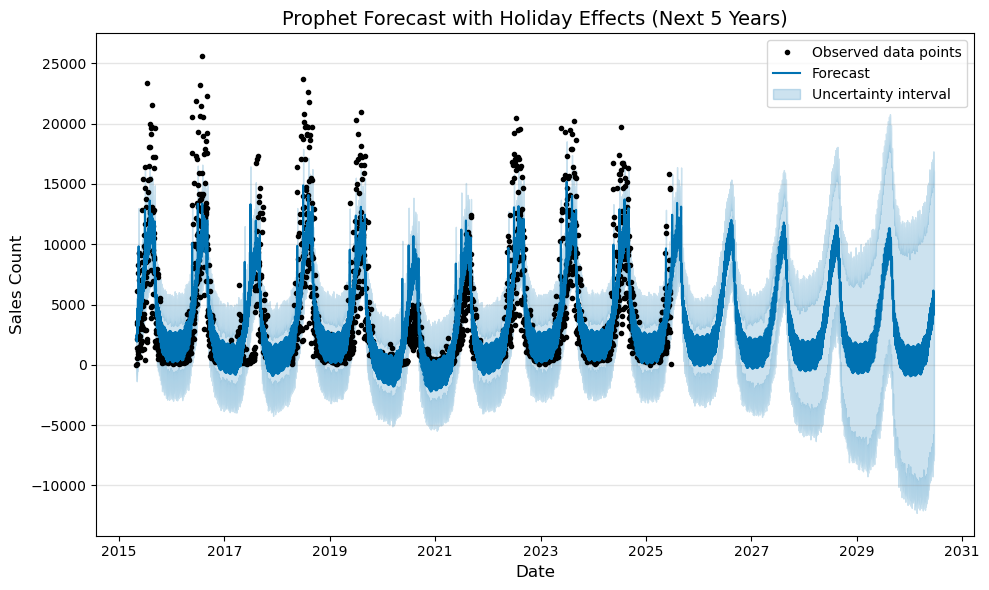

In [88]:
from prophet import Prophet

# Prepare data
prophet_df = full_df[['Date', 'Sales Count']].copy().rename(columns={'Date': 'ds', 'Sales Count': 'y'})

# Initialize Prophet with holiday support
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    holidays=canadian_holidays
)

# Fit the model
model.fit(prophet_df)

# Forecast 5 years ahead
future = model.make_future_dataframe(periods=1825, freq='D')
forecast = model.predict(future)

# Plot with holidays
# Plot the forecast
fig = model.plot(forecast)

# Customize plot
plt.title('Prophet Forecast with Holiday Effects (Next 5 Years)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales Count', fontsize=12)

# Remove x-axis gridlines (keep y-axis )
ax = fig.gca()
ax.xaxis.grid(False)  
ax.yaxis.grid(True)  

# Add legend 
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.show()

In [89]:
#split data into train and test set

train = prophet_df.iloc[:-365]
test = prophet_df.iloc[-365:]


In [90]:
# Create and train a Prophet model with:
# - yearly and weekly seasonality components enabled
# - custom holiday effects from the 'canadian_holidays' DataFrame

model_eval = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    holidays=canadian_holidays
)
model_eval.fit(train)


15:54:02 - cmdstanpy - INFO - Chain [1] start processing
15:54:02 - cmdstanpy - INFO - Chain [1] done processing


In [91]:
# Check range of forecasted dates
print(forecast_eval['ds'].min(), forecast_eval['ds'].max())

# Check range of test dates
print(test['ds'].min(), test['ds'].max())



2015-05-01 00:00:00 2025-06-19 00:00:00
2024-06-20 00:00:00 2025-06-20 00:00:00


In [92]:
# Merge test and forecast to ensure index alignment
forecast_subset = forecast_eval[['ds', 'yhat']].merge(test, on='ds', how='inner')


In [93]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(forecast_subset['y'], forecast_subset['yhat']))
mae = mean_absolute_error(forecast_subset['y'], forecast_subset['yhat'])
r2 = r2_score(forecast_subset['y'], forecast_subset['yhat'])

mean_actual = test['y'].mean()

rmse_normalized = 2178.49 / mean_actual
mae_normalized = 1539.36 / mean_actual

print(f"Normalized RMSE: {rmse_normalized:.3f}")
print(f"Normalized MAE: {mae_normalized:.3f}")
print(f"R²: {r2:.3f}")


Normalized RMSE: 0.591
Normalized MAE: 0.418
R²: 0.730
